# Clinopyroxene-only and Clinopyroxene-Liquid Thermobarometry.
- This notebook goes through the options for clinopyroxene-Liquid thermobarometry and clinopyroxene-only thermobarometry
- Cpx-Liq matching is not covered in this tutorial, there is a separate folder "Cpx_Liquid_melt_matching" for that 
- You can download the excel spreadsheet from:
https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Cpx_Cpx_Liq_Thermobarometry/Cpx_Liq_Example.xlsx

### You need to install Thermobar once on your machine, if you haven't done this yet, uncomment the line below (remove the #)

In [1]:
#!pip install Thermobar

## First, load the necessary python things

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt

## Now, load the data 

In [3]:
out=pt.import_excel('Cpx_Liq_Example.xlsx', sheet_name="Sheet1")
my_input=out['my_input']
Liqs=out['Liqs']
Cpxs=out['Cpxs']

## Inspect the data to check it loaded properly

In [4]:
Liqs.head()

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,51.1,0.93,17.5,8.91,0.18,6.09,11.50,3.53,0.17,0.0,0.15,3.8,0.0,0.0,0.0,0.0,0
1,51.5,1.19,19.2,8.70,0.19,4.98,10.00,3.72,0.42,0.0,0.14,6.2,0.0,0.0,0.0,0.0,1
2,59.1,0.54,19.1,5.22,0.19,3.25,7.45,4.00,0.88,0.0,0.31,6.2,0.0,0.0,0.0,0.0,2
3,52.5,0.98,19.2,8.04,0.20,4.99,9.64,4.15,0.21,0.0,0.14,6.2,0.0,0.0,0.0,0.0,3
4,56.2,0.34,20.4,5.88,0.20,2.58,7.18,6.02,1.02,0.0,0.23,6.2,0.0,0.0,0.0,0.0,4


In [5]:
Cpxs.head()

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,51.5,0.50,3.70,5.18,0.09,15.8,22.8,0.24,0.0,0.66,0
1,50.3,0.73,4.12,5.83,0.00,15.0,22.7,0.24,0.0,0.28,1
2,47.3,1.75,7.85,6.51,0.14,13.1,22.5,0.25,0.0,0.22,2
3,51.1,0.63,4.41,5.66,0.13,15.6,22.6,0.23,0.0,0.27,3
4,51.0,0.56,4.14,7.33,0.20,14.4,22.4,0.31,0.0,0.09,4


## Getting help
- At any point, you can do help(pt.function) to get some more information
- For example, here we get information on inputs/outputs for Cpx-Liq thermometry, including the equation options

In [6]:
help(pt.calculate_cpx_liq_temp)

Help on function calculate_cpx_liq_temp in module Thermobar.clinopyroxene_thermobarometry:

calculate_cpx_liq_temp(*, equationT, cpx_comps=None, liq_comps=None, meltmatch=None, P=None, eq_tests=False, H2O_Liq=None, Fe3Fet_Liq=None, sigma=1, Kd_Err=0.03)
    Clinopyroxene-Liquid thermometry, calculates temperature in Kelvin
    (and equilibrium tests as an option)
    
    Parameters
    -------
    cpx_comps: pandas.DataFrame
        Clinopyroxene compositions with column headings SiO2_Cpx, MgO_Cpx etc.
    
    liq_comps: pandas.DataFrame
        Liquid compositions with column headings SiO2_Liq, MgO_Liq etc.
    
    Or:
    
    meltmatch: pandas.DataFrame
        Combined dataframe of cpx-Liquid compositions
        Used for calculate_cpx_liq_press_temp_matching function.
    
    EquationT: str
        Choice of equation:
        Cpx-Liquid
        |  T_Put1996_eqT1  (P-indep, H2O-indep)
        |  T_Mas2013_eqTalk1  (P-indep, H2O-indep, alk adaption of T1)
        |  T_Brug2019  

## Example 1 - Calculating Temperature


### 1a - Temperature for a known pressure and water content
- Here, we calculate temperature using the H2O content given in the H2O_Liq column in the user-entered spreadsheet (the default), and P=5 kbar
- There are a number of equations (see help above), but here we use T_Put2008_eq33 for temperature

In [7]:
Temp_T33=pt.calculate_cpx_liq_temp(cpx_comps=Cpxs, liq_comps=Liqs,
                        equationT="T_Put2008_eq33", P=5)-273.15 # Default Kelvin
Temp_T33

0     1091.562867
1     1031.605285
2      999.303442
3     1032.536881
4      979.726983
5     1076.821062
6     1096.927022
7     1097.227100
8     1113.361468
9     1084.298534
10    1091.178760
11    1071.691587
12    1089.996302
13    1028.359107
14    1028.359107
15    1028.359107
16    1093.611526
17            NaN
18    1087.546061
19    1104.700975
dtype: float64

### 1b - Temperature, overwriting the spreadsheet water content in the function itself
- Here, we are reseting water to 0 wt%. You can see the temperatures are much higher

In [8]:
Temp_T33_0H2O=pt.calculate_cpx_liq_temp(cpx_comps=Cpxs, liq_comps=Liqs, 
                                        equationT="T_Put2008_eq33",
                                        P=5, H2O_Liq=0)-273.15
Temp_T33_0H2O

0     1142.969951
1     1109.923744
2     1073.681511
3     1110.970579
4     1051.769286
5     1134.212162
6     1149.012230
7     1159.843300
8     1174.122141
9     1141.430504
10    1144.660690
11    1131.557607
12    1144.720092
13    1076.010017
14    1076.010017
15    1076.010017
16    1150.716488
17            NaN
18    1150.219143
19    1159.165100
dtype: float64

### 1c- Lets use the thermometer of Brugman and Till, 2019. 
- This returns a number of warnings, because the authors recomend a compositional calibration range, which our entered cpx compositions lie outside of.

In [9]:
Temp_TBrug=pt.calculate_cpx_liq_temp(cpx_comps=Cpxs, liq_comps=Liqs, 
                                    equationT="T_Brug2019", P=5)-273.15
Temp_TBrug

Youve selected a P-independent function


C:\Users\penny\AppData\Local\Temp\ipykernel_11064\1899851194.py:1: UserWarning: Some inputted CPX compositions have Cpx Mg#>0.65;.
  Temp_TBrug=pt.calculate_cpx_liq_temp(cpx_comps=Cpxs, liq_comps=Liqs,
C:\Users\penny\AppData\Local\Temp\ipykernel_11064\1899851194.py:1: UserWarning: Some inputted CPX compositions have Al2O3>7 wt%;.
  Temp_TBrug=pt.calculate_cpx_liq_temp(cpx_comps=Cpxs, liq_comps=Liqs,
C:\Users\penny\AppData\Local\Temp\ipykernel_11064\1899851194.py:1: UserWarning: Some inputted Liq compositions have  SiO2<70 wt%;
  Temp_TBrug=pt.calculate_cpx_liq_temp(cpx_comps=Cpxs, liq_comps=Liqs,
c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\clinopyroxene_thermobarometry.py:2210: UserWarning: which is outside the recomended calibration range of Brugman and Till (2019)
  w.warn("which is outside the recomended calibration range of Brugman and Till (2019)")


0     1797.689417
1     1632.682392
2     1202.363348
3     1558.356437
4     1028.947694
5     1828.840169
6     1889.290499
7     1772.472552
8     1946.324399
9     1873.382098
10    1881.239956
11    1834.031996
12    1853.418730
13    1868.159678
14    1868.159678
15    1868.159678
16    1836.411331
17    1857.905516
18    1928.817708
19    1973.023872
dtype: float64

### 1d - We can also specify eq_tests=True to get a full dataframe back with all the components, as well as a number of equilibrium test values
- You could then extract just the temps using Temp_T33_0H2O_EqTests['T_K_calc'] or any other column you want the same way

In [10]:
Temp_T33_0H2O_EqTests=pt.calculate_cpx_liq_temp(cpx_comps=Cpxs, liq_comps=Liqs, 
                                                equationT="T_Put2008_eq33", 
                                                P=5, H2O_Liq=0, eq_tests=True)
Temp_T33_0H2O_EqTests

Using Fe3FeT from input file to calculate Kd Fe-Mg


,P_kbar_calc,T_K_calc,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,...,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999
0,5,1416.119951,False,0.042816,0.094027,0.010858,0.021183,0.016957,0.089424,0.001586,...,-0.010858,0.013418,-0.016957,0.000000,0.009562,0.043320,0.002307,0.016184,0.000872,0.000872
1,5,1383.073744,False,0.036792,0.090778,0.007575,0.021866,0.023796,0.104285,0.024207,...,-0.007575,0.013021,-0.023796,0.000000,0.004122,0.056932,0.011994,0.017429,0.000099,0.000099
2,5,1346.831511,False,0.058659,0.172858,0.043395,0.013382,0.075254,0.006413,0.103915,...,0.043395,0.016630,-0.075254,0.000000,0.003245,0.029418,0.042249,0.018331,0.000246,0.000246
3,5,1384.120579,False,0.034331,0.101144,0.012488,0.028698,0.031526,0.084045,0.024697,...,-0.012488,0.014301,-0.031526,0.000000,0.003909,0.050962,0.009764,0.019332,0.002997,0.002997
4,5,1324.919286,False,0.022156,0.097447,0.021106,0.049019,0.032121,0.071950,0.035481,...,-0.021106,0.010990,-0.032121,0.000000,0.001315,0.050713,0.014761,0.027953,0.005738,0.005738
5,5,1407.362162,False,0.011745,0.133688,0.008645,0.029286,0.012999,0.062059,0.001463,...,-0.008645,0.012999,0.012999,0.297720,0.277125,0.057369,0.026926,0.019470,0.006126,0.006126
6,5,1422.162230,False,0.011959,0.091270,0.008903,0.024363,0.014640,0.070686,0.003636,...,-0.008903,0.014640,0.014640,0.130559,0.110135,0.052890,0.032902,0.015664,0.002722,0.002722
7,5,1432.993300,False,0.052296,0.077646,0.007652,0.024590,0.015888,0.054068,0.010131,...,-0.007652,0.015888,0.015888,0.148010,0.125617,0.045423,0.029060,0.018272,0.011840,0.011840
8,5,1447.272141,False,0.046595,0.085580,0.020659,0.043637,0.007563,0.082456,0.039311,...,-0.020659,0.016662,0.007563,0.001101,0.017485,0.052715,0.016339,0.015821,0.008622,0.008622
9,5,1414.580504,False,0.018097,0.116199,0.015372,0.032515,0.013343,0.083869,0.008159,...,-0.015372,0.013343,0.013343,0.003516,0.010965,0.059753,0.014958,0.018210,0.004591,0.004591


## Example 2 - Calculating pressure for a known temperature

### 2a - Pressure at fixed temperature (T=1300 K), and pressures from Neave and Putirka (2017) 

In [11]:
P_FixedTNeave=pt.calculate_cpx_liq_press(cpx_comps=Cpxs, liq_comps=Liqs, 
                                       equationP="P_Neave2017", T=1300)
P_FixedTNeave

0      0.634602
1      1.655874
2      1.146083
3      1.028349
4      3.854147
5      0.077818
6      0.103202
7      3.902001
8      3.198764
9     -0.172497
10    -0.067569
11    -2.437195
12     0.531826
13   -14.887115
14   -14.887115
15   -14.887115
16     1.346623
17          NaN
18     0.405712
19     1.682571
dtype: float64

### 2b - Equation 30 from Putirka (2008), overwriting input water, return equilibrium tests
- Here we change equation P, overwrite the H2O content in the function, and ask for equilibrium tests.
- We are selecting equation 30 from Putirka (2008) this time, T=1300 K

In [12]:
Temp_P30_0H2O=pt.calculate_cpx_liq_press(cpx_comps=Cpxs, liq_comps=Liqs, 
                                         equationP="P_Put2008_eq30",
                                         T=1300, H2O_Liq=0, eq_tests=True)
Temp_P30_0H2O

Using Fe3FeT from input file to calculate Kd Fe-Mg


,P_kbar_calc,T_K_calc,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,...,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999
0,-2.090909,1300,False,0.015390,0.116829,0.002696,0.003912,0.019173,0.089851,0.350659,...,-0.002696,0.011202,-0.019173,0.000000,0.009562,0.047180,0.006167,0.016165,0.000891,0.000891
1,-2.604072,1300,True,0.016996,0.108121,0.006605,0.005373,0.025431,0.049622,0.286210,...,0.006605,0.011385,-0.025431,0.000000,0.004122,0.060657,0.015718,0.017407,0.000077,0.000077
2,-2.145841,1300,False,0.069927,0.183575,0.074576,0.029940,0.076260,0.125978,0.249574,...,0.074576,0.015625,-0.076260,0.000000,0.003245,0.030292,0.041375,0.018308,0.000223,0.000223
3,-2.334004,1300,False,0.014291,0.117657,0.003134,0.008701,0.033245,0.066274,0.281808,...,0.003134,0.012582,-0.033245,0.000000,0.003909,0.054136,0.012939,0.019308,0.002973,0.002973
4,-0.177987,1300,False,0.016126,0.102892,0.007476,0.045035,0.032562,0.004383,0.113023,...,-0.007476,0.010549,-0.032562,0.000000,0.001315,0.051697,0.015744,0.027927,0.005712,0.005712
5,-3.656248,1300,False,0.037163,0.157156,0.008999,0.005334,0.011085,0.129807,0.319319,...,0.008999,0.011085,0.011085,0.297720,0.277125,0.061850,0.022445,0.019441,0.006098,0.006098
6,-3.959117,1300,False,0.016846,0.121449,0.007682,0.004097,0.012259,0.135041,0.353721,...,0.007682,0.012259,0.012259,0.130559,0.110135,0.057515,0.028277,0.015640,0.002698,0.002698
7,0.216684,1300,False,0.021028,0.105244,0.007877,0.010227,0.013249,0.108774,0.364703,...,-0.007877,0.013249,0.013249,0.148010,0.125617,0.049502,0.024980,0.018258,0.011854,0.011854
8,-0.678349,1300,False,0.012104,0.115746,0.019128,0.005116,0.004551,0.094621,0.357156,...,-0.019128,0.013650,0.004551,0.001101,0.017485,0.057933,0.011121,0.015807,0.008636,0.008636
9,-3.118628,1300,False,0.008977,0.139129,0.002217,0.008054,0.011220,0.104703,0.331041,...,-0.002217,0.011220,0.011220,0.003516,0.010965,0.064853,0.009859,0.018185,0.004566,0.004566


### 2c - As above, but setting a fixed Fe3Fet_Liq ratio
- Can overwrite the Fe3Fet in the input spreadsheet to a different value, affects calculations of delta Kd as this uses just Fe2+ in the melt
- Note, it is debated whether Kd Fe-Mg should be calculated with all Fe (to do that here, specify Fe3Fet_Liq=0, Putirka), or using just Fe2+ (e.g., Neave and Putirka, 2017)
- you can compare the delta Kd Put 2008 in this option from the answers above. You can see, by adding 30% Fe3+, you have become further from equilibrium

In [13]:
Temp_P30_0H2O_30Fe=pt.calculate_cpx_liq_press(cpx_comps=Cpxs, 
                    liq_comps=Liqs, equationP="P_Put2008_eq30", 
                    T=1300, H2O_Liq=0, Fe3Fet_Liq=0.3, eq_tests=True)
Temp_P30_0H2O_30Fe

,P_kbar_calc,T_K_calc,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,...,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999
0,-2.090909,1300,False,0.080646,0.212865,0.002696,0.003912,0.019173,0.089851,0.350659,...,-0.002696,0.011202,-0.019173,0.000000,0.009562,0.047180,0.006167,0.016165,0.000891,0.000891
1,-2.604072,1300,False,0.078351,0.203468,0.006605,0.005373,0.025431,0.049622,0.286210,...,0.006605,0.011385,-0.025431,0.000000,0.004122,0.060657,0.015718,0.017407,0.000077,0.000077
2,-2.145841,1300,False,0.202528,0.316176,0.074576,0.029940,0.076260,0.125978,0.249574,...,0.074576,0.015625,-0.076260,0.000000,0.003245,0.030292,0.041375,0.018308,0.000223,0.000223
3,-2.334004,1300,False,0.082216,0.214165,0.003134,0.008701,0.033245,0.066274,0.281808,...,0.003134,0.012582,-0.033245,0.000000,0.003909,0.054136,0.012939,0.019308,0.002973,0.002973
4,-0.177987,1300,False,0.079595,0.198613,0.007476,0.045035,0.032562,0.004383,0.113023,...,-0.007476,0.010549,-0.032562,0.000000,0.001315,0.051697,0.015744,0.027927,0.005712,0.005712
5,-3.656248,1300,False,0.155721,0.275715,0.008999,0.005334,0.011085,0.129807,0.319319,...,0.008999,0.011085,0.011085,0.297720,0.277125,0.061850,0.022445,0.019441,0.006098,0.006098
6,-3.959117,1300,False,0.126698,0.231301,0.007682,0.004097,0.012259,0.135041,0.353721,...,0.007682,0.012259,0.012259,0.130559,0.110135,0.057515,0.028277,0.015640,0.002698,0.002698
7,0.216684,1300,False,0.072592,0.198864,0.007877,0.010227,0.013249,0.108774,0.364703,...,-0.007877,0.013249,0.013249,0.148010,0.125617,0.049502,0.024980,0.018258,0.011854,0.011854
8,-0.678349,1300,False,0.085341,0.213191,0.019128,0.005116,0.004551,0.094621,0.357156,...,-0.019128,0.013650,0.004551,0.001101,0.017485,0.057933,0.011121,0.015807,0.008636,0.008636
9,-3.118628,1300,False,0.115456,0.245608,0.002217,0.008054,0.011220,0.104703,0.331041,...,-0.002217,0.011220,0.011220,0.003516,0.010965,0.064853,0.009859,0.018185,0.004566,0.004566


## Example 3 - Iterating pressure and temperature
- In reality, unlesa you are an experimentalist, you rarely know one of pressure or temperature
- In Keith Putirka's spreadsheets, you can link up columns to iterate P and T towards a solution, this can be done here using the function calculate_cpx_liq_press_temp...

### 3a - Iterating equation 30 from Putirka (2008) for P, and equation 33 from Putirka (2008) for T
- Without specifying anything else, you get a dataframe with columns for calculated pressure and temperature

In [14]:
PT_iter_30_31=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpxs, liq_comps=Liqs,
                                              equationP="P_Put2008_eq30", 
                                              equationT="T_Put2008_eq33")
PT_iter_30_31

,P_kbar_calc,T_K_calc,Delta_P_kbar_Iter,Delta_T_K_Iter
0,2.530914,1352.408784,0.0,0.0
1,1.786845,1290.151507,0.0,0.0
2,1.171520,1255.933868,0.0,0.0
3,2.143416,1292.669093,0.0,0.0
4,2.763538,1243.469600,0.0,0.0
5,0.535148,1328.353392,0.0,0.0
6,0.493360,1347.611001,0.0,0.0
7,6.377576,1377.397773,0.0,0.0
8,5.742168,1390.374437,0.0,0.0
9,1.396263,1339.752950,0.0,0.0


### 3b - Same as above, but with eq_tests=True
- Get all equilibrium tests, and input compostions as a larger dataframe.

In [15]:
PT_iter_30_31_EqTests=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpxs, liq_comps=Liqs, equationP="P_Put2008_eq30", 
                                                      equationT="T_Put2008_eq33", eq_tests=True)
PT_iter_30_31_EqTests

Using Fe3FeT from input file to calculate Kd Fe-Mg


,P_kbar_calc,T_K_calc,Eq Tests Neave2017?,Delta_P_kbar_Iter,Delta_T_K_Iter,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,...,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999
0,2.530914,1352.408784,True,0.0,0.0,0.027981,0.106599,0.011304,0.009468,0.018174,...,-0.011304,0.012201,-0.018174,0.000000,0.009562,0.045314,0.004301,0.016178,0.000878,0.000878
1,1.786845,1290.151507,True,0.0,0.0,0.014591,0.110154,0.009917,0.002832,0.025619,...,-0.009917,0.011198,-0.025619,0.000000,0.004122,0.061147,0.016209,0.017420,0.000090,0.000090
2,1.171520,1255.933868,False,0.0,0.0,0.080784,0.193537,0.046615,0.050574,0.077199,...,0.046615,0.014686,-0.077199,0.000000,0.003245,0.031201,0.040466,0.018319,0.000234,0.000234
3,2.143416,1292.669093,False,0.0,0.0,0.012502,0.119081,0.015465,0.006444,0.033388,...,-0.015465,0.012439,-0.033388,0.000000,0.003909,0.054443,0.013245,0.019323,0.002988,0.002988
4,2.763538,1243.469600,False,0.0,0.0,0.002154,0.115101,0.025085,0.033393,0.033542,...,-0.025085,0.009568,-0.033542,0.000000,0.001315,0.054153,0.018201,0.027943,0.005728,0.005728
5,0.535148,1328.353392,False,0.0,0.0,0.030307,0.151008,0.003629,0.013160,0.011592,...,-0.003629,0.011592,0.011592,0.297720,0.277125,0.060562,0.023733,0.019456,0.006112,0.006112
6,0.493360,1347.611001,True,0.0,0.0,0.005393,0.109769,0.003040,0.009391,0.013188,...,-0.003040,0.013188,0.013188,0.130559,0.110135,0.055566,0.030226,0.015652,0.002710,0.002710
7,6.377576,1377.397773,False,0.0,0.0,0.039499,0.089259,0.019500,0.013119,0.014794,...,-0.019500,0.014794,0.014794,0.148010,0.125617,0.046990,0.027492,0.018277,0.011835,0.011835
8,5.742168,1390.374437,False,0.0,0.0,0.033597,0.097318,0.031008,0.032361,0.006409,...,-0.031008,0.015508,0.006409,0.001101,0.017485,0.054544,0.014511,0.015824,0.008619,0.008619
9,1.396263,1339.752950,True,0.0,0.0,0.000606,0.131231,0.013266,0.018402,0.011957,...,-0.013266,0.011957,0.011957,0.003516,0.010965,0.062936,0.011776,0.018199,0.004581,0.004581


## Example 3 - Cpx-only Barometry
- Very similar to above, just don't need liq_comps input

### 3a -Pressure only, using equation 32b (at T=1300 K), and H2O=0
- This equation requires H2O content in the liquid. If you don't enter anything, it assumes H2O=0
- else specify using H2O_Liq=....
- it prints a warning telling you that by defualt, this is what the function is doing

In [16]:
eq32b_noH=pt.calculate_cpx_only_press(cpx_comps=Cpxs, T=1300,
       equationP="P_Put2008_eq32b")
eq32b_noH

c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\clinopyroxene_thermobarometry.py:3287: UserWarning: This Cpx-only barometer is sensitive to H2O content of the liquid.  By default, this function uses H2O=0 wt%, else you can enter a value of H2O_Liq in the function
  w.warn('This Cpx-only barometer is sensitive to H2O content of the liquid. '


0     -1.567381
1     -1.202221
2     -0.317946
3     -0.996608
4      0.467437
5     -6.911370
6     -6.286860
7    -11.586143
8     -3.498491
9    -13.658623
10   -11.540359
11   -13.391546
12   -14.272181
13   -18.202136
14   -18.202136
15   -18.202136
16   -10.918332
17          NaN
18    -5.618846
19    -8.241059
dtype: float64

### 3b -  Pressure only, using 5 wt% water

In [17]:
eq32b_5H=pt.calculate_cpx_only_press(cpx_comps=Cpxs, T=1300,
       equationP="P_Put2008_eq32b", H2O_Liq=5)
eq32b_5H

0      0.697619
1      1.062779
2      1.947054
3      1.268392
4      2.732437
5     -4.646370
6     -4.021860
7     -9.321143
8     -1.233491
9    -11.393623
10    -9.275359
11   -11.126546
12   -12.007181
13   -15.937136
14   -15.937136
15   -15.937136
16    -8.653332
17          NaN
18    -3.353846
19    -5.976059
dtype: float64

### 3c - Temperature-only using eq 32d at 5 kbar

In [18]:
eq32d_5kbar=pt.calculate_cpx_only_temp(cpx_comps=Cpxs, equationT="T_Put2008_eq32d",
         P=5)
eq32d_5kbar

0     1457.849197
1     1441.107847
2     1415.899813
3     1455.722443
4     1441.512524
5     1413.510042
6     1420.741893
7     1406.196227
8     1463.728870
9     1393.605045
10    1239.894412
11    1413.752159
12    1402.402180
13    1360.089648
14    1360.089648
15    1360.089648
16    1366.264788
17    1381.658652
18    1396.089868
19    1412.298889
dtype: float64

### 3d - Iterating P from 32b, and T from 32d, with H2O=5

In [19]:
eq32b_32d_5H=pt.calculate_cpx_only_press_temp(cpx_comps=Cpxs, equationT="T_Put2008_eq32d",
       equationP="P_Put2008_eq32b", H2O_Liq=5)
eq32b_32d_5H

,P_kbar_calc,T_K_calc,Delta_P_kbar_Iter,Delta_T_K_Iter,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,...,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21
0,3.889323,1448.656494,0.000000e+00,0.000000e+00,51.500000,0.500000,3.700000,5.180000,0.090000,15.800000,...,0.017055,0,0.030375,0.041013,0.814436,0.103827,0.814436,0.686042,0.035332,0.123446
1,3.721484,1430.647515,0.000000e+00,0.000000e+00,50.300000,0.730000,4.120000,5.830000,0.000000,15.000000,...,0.017330,0,0.036817,0.044938,0.819939,0.097220,0.819939,0.673165,0.040732,0.140847
2,3.982623,1407.721620,0.000000e+00,0.000000e+00,47.300000,1.750000,7.850000,6.510000,0.140000,13.100000,...,0.018085,0,0.091885,0.071667,0.732671,0.099545,0.732671,0.570239,0.038619,0.164508
3,4.567865,1452.151021,2.273737e-13,1.818989e-12,51.100000,0.630000,4.410000,5.660000,0.130000,15.600000,...,0.016335,0,0.045827,0.041197,0.796049,0.114596,0.796049,0.658834,0.039859,0.133524
4,5.941303,1449.216073,0.000000e+00,0.000000e+00,51.000000,0.560000,4.140000,7.330000,0.200000,14.400000,...,0.022215,0,0.043110,0.035953,0.806694,0.106652,0.806694,0.623678,0.038138,0.188429
5,-4.055503,1340.840204,2.273737e-13,1.591616e-12,51.893554,0.985648,4.374039,6.014774,0.427037,15.882719,...,0.013343,1,0.000000,0.084295,0.792618,0.110258,0.792618,0.645602,0.105585,0.071935
6,-3.177367,1354.783292,0.000000e+00,0.000000e+00,51.671503,1.222254,4.424609,5.755014,0.537483,15.849673,...,0.012942,1,0.000000,0.085792,0.788624,0.108885,0.788624,0.644849,0.091360,0.078945
7,-9.419020,1291.083222,0.000000e+00,0.000000e+00,52.462671,0.861366,4.306456,5.521574,0.093405,15.931721,...,0.030112,1,0.000000,0.074483,0.768475,0.116216,0.768475,0.641596,0.085759,0.077164
8,1.553018,1435.084291,0.000000e+00,0.000000e+00,52.341465,0.558521,4.332519,5.307290,0.531408,16.743678,...,0.024443,0,0.009099,0.069054,0.768797,0.135942,0.768797,0.642889,0.071195,0.085917
9,-11.734771,1261.200708,-2.273737e-13,-1.591616e-12,51.905733,0.643097,3.880163,5.651830,0.614606,16.146415,...,0.013619,1,0.000000,0.074712,0.802701,0.111995,0.802701,0.659037,0.116120,0.052394


## Example 4 - Plotting a Cpx-Liq Rhodes diagram to assess Fe-Mg equilibrium using fixed Kd values
- The function calculate_cpx_rhodes_diagram_lines calculates the lines needed for the plot in a number of ways 
- There is disagrement in the literature as to whether Kd Fe-Mg should be assessed using just Fe2+ in the melt, or FeT, so we show both scenarios here. 

### Step 1 - Calculate Mg# for liq and cpxs
- A number of functions in thermobar let you do it, we use this one here because it returns Mg#s for both phases

In [20]:
cpx_comps_Fe3=pt.calculate_clinopyroxene_liquid_components(liq_comps=Liqs, 
                cpx_comps=Cpxs, Fe3Fet_Liq=0.2)

- Mgnos of Cpx are stored in the column accesed by cpx_comps_Fe3['Mgno_Cpx']
- Mgnos of Liq are stored in the column accesed by  cpx_comps_Fe3['Mgno_Liq_noFe3'], for no Fe3,
 or cpx_comps_Fe3['Mgno_Liq_Fe2'] using just Fe2+ (e.g., 20% of Fe is 3+ here)

### Step 2 - Calculate equilibrium lines to show on the rhodes diagram
- You tell the function the min and max glass Mg# you want to show, e.g., the xspan of your plot
- It returns lines for Kd=0.28+-0.08 after Putirka (2008)

In [21]:
# Want to calculate Mg# to show on diagram between say 0.4 and 0.7 for the glass
eq_lines_1=pt.calculate_cpx_rhodes_diagram_lines(Min_Mgno=0.4, Max_Mgno=0.7)
eq_lines_1

,Mg#_Liq,Eq_Cpx_Mg# (Kd=0.28),Eq_Cpx_Mg# (Kd=0.2),Eq_Cpx_Mg# (Kd=0.36)
0,0.400000,0.704225,0.769231,0.649351
1,0.403030,0.706845,0.771462,0.652217
2,0.406061,0.709445,0.773672,0.655065
3,0.409091,0.712025,0.775862,0.657895
4,0.412121,0.714586,0.778032,0.660707
...,...,...,...,...
95,0.687879,0.887273,0.916801,0.859588
96,0.690909,0.888681,0.917874,0.861287
97,0.693939,0.890081,0.918941,0.862979
98,0.696970,0.891473,0.920000,0.864662


### Step 3 - Combine these on a plot
- You might need to adust the x and y limits of this plot for your own data

(0.6, 0.95)

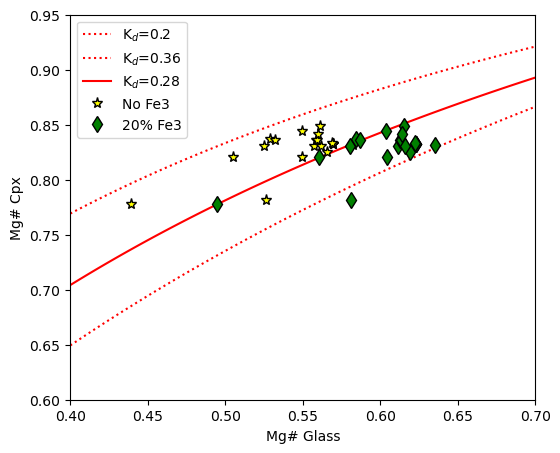

In [22]:
fig, (ax1) = plt.subplots(1, 1, figsize = (6,5))
ax1.plot(eq_lines_1['Mg#_Liq'], eq_lines_1['Eq_Cpx_Mg# (Kd=0.2)'], ':r', label="K$_d$=0.2")
ax1.plot(eq_lines_1['Mg#_Liq'], eq_lines_1['Eq_Cpx_Mg# (Kd=0.36)'], ':r', label="K$_d$=0.36")
ax1.plot(eq_lines_1['Mg#_Liq'], eq_lines_1['Eq_Cpx_Mg# (Kd=0.28)'], '-r', label="K$_d$=0.28")

ax1.plot(cpx_comps_Fe3['Mgno_Liq_noFe3'], cpx_comps_Fe3['Mgno_Cpx'], '*k', mfc='yellow', ms=8, label="No Fe3")
ax1.plot(cpx_comps_Fe3['Mgno_Liq_Fe2'], cpx_comps_Fe3['Mgno_Cpx'], 'dk', mfc='green', ms=8, label="20% Fe3")
ax1.legend()
ax1.set_xlabel('Mg# Glass')
ax1.set_ylabel('Mg# Cpx')
# adjust x and y limits
ax1.set_xlim([0.4, 0.7])
ax1.set_ylim([0.6, 0.95])

## Example 5 - Rhodes diagram using equation 35 of Putirka to calculate Kd as a function of T.
- Here, we plot the equilibrium fields on the Rhodes diagram using equation 35 of Putirka, which is T-sensitive
- Must specify T in Kelvin. Then return column for default 0.28, as well as the results for Putirka eq 35.

In [23]:
eq_lines_2=pt.calculate_cpx_rhodes_diagram_lines(Min_Mgno=0.4, Max_Mgno=0.7, T=1300)
eq_lines_2.head()

,Mg#_Liq,Eq_Cpx_Mg# (Kd=0.28),Eq_Cpx_Mg# (Kd=0.2),Eq_Cpx_Mg# (Kd=0.36),Kd_Eq35_P2008,Eq_Cpx_Mg# (Kd from Eq 35 P2008),Eq_Cpx_Mg# (Eq 35 P2008)+0.08,Eq_Cpx_Mg# (Eq 35 P2008)-0.08
0,0.400000,0.704225,0.769231,0.649351,0.239475,0.735720,0.676036,0.806964
1,0.403030,0.706845,0.771462,0.652217,0.239475,0.738165,0.678791,0.808921
2,0.406061,0.709445,0.773672,0.655065,0.239475,0.740589,0.681528,0.810858
3,0.409091,0.712025,0.775862,0.657895,0.239475,0.742993,0.684246,0.812775
4,0.412121,0.714586,0.778032,0.660707,0.239475,0.745377,0.686945,0.814673


(0.6, 0.95)

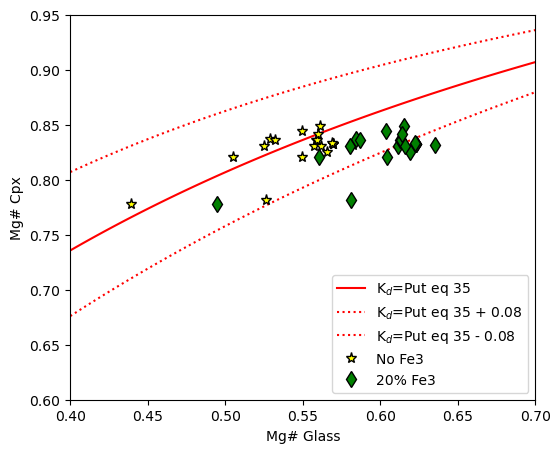

In [24]:
fig, (ax1) = plt.subplots(1, 1, figsize = (6,5))
ax1.plot(eq_lines_2['Mg#_Liq'], eq_lines_2['Eq_Cpx_Mg# (Kd from Eq 35 P2008)'], '-r', label="K$_d$=Put eq 35")
ax1.plot(eq_lines_2['Mg#_Liq'], eq_lines_2['Eq_Cpx_Mg# (Eq 35 P2008)+0.08'], ':r', label="K$_d$=Put eq 35 + 0.08")
ax1.plot(eq_lines_2['Mg#_Liq'], eq_lines_2['Eq_Cpx_Mg# (Eq 35 P2008)-0.08'], ':r', label="K$_d$=Put eq 35 - 0.08")
ax1.set_xlim([0.4, 0.7])
ax1.plot(cpx_comps_Fe3['Mgno_Liq_noFe3'], cpx_comps_Fe3['Mgno_Cpx'], '*k', mfc='yellow', ms=8, label="No Fe3")
ax1.plot(cpx_comps_Fe3['Mgno_Liq_Fe2'], cpx_comps_Fe3['Mgno_Cpx'], 'dk', mfc='green', ms=8, label="20% Fe3")
ax1.legend()
ax1.set_xlabel('Mg# Glass')
ax1.set_ylabel('Mg# Cpx')

# adjust x and y limits
ax1.set_xlim([0.4, 0.7])
ax1.set_ylim([0.6, 0.95])

##  Example 6 - You can also specify a minimum and maximum Kd value you wish to calculate Rhodes lines for (here 0.2, 0.3)

In [25]:
eq_lines_3=pt.calculate_cpx_rhodes_diagram_lines(Min_Mgno=0.4, Max_Mgno=0.7, KdMin=0.2, KdMax=0.3)
eq_lines_3.head()

,Mg#_Liq,Eq_Cpx_Mg# (Kd=0.28),Eq_Cpx_Mg# (Kd=0.2),Eq_Cpx_Mg# (Kd=0.36),Eq_Cpx_Mg# (KdMin=0.2),Eq_Cpx_Mg# (KdMax=0.3)
0,0.400000,0.704225,0.769231,0.649351,0.769231,0.689655
1,0.403030,0.706845,0.771462,0.652217,0.771462,0.692348
2,0.406061,0.709445,0.773672,0.655065,0.773672,0.695021
3,0.409091,0.712025,0.775862,0.657895,0.775862,0.697674
4,0.412121,0.714586,0.778032,0.660707,0.778032,0.700309


(0.6, 0.95)

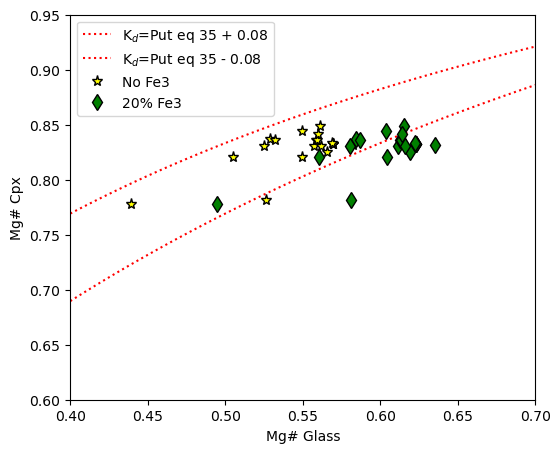

In [26]:
fig, (ax1) = plt.subplots(1, 1, figsize = (6,5))
ax1.plot(eq_lines_3['Mg#_Liq'], eq_lines_3['Eq_Cpx_Mg# (KdMin=0.2)'], ':r', label="K$_d$=Put eq 35 + 0.08")
ax1.plot(eq_lines_3['Mg#_Liq'], eq_lines_3['Eq_Cpx_Mg# (KdMax=0.3)'], ':r', label="K$_d$=Put eq 35 - 0.08")
ax1.set_xlim([0.4, 0.7])
ax1.plot(cpx_comps_Fe3['Mgno_Liq_noFe3'], cpx_comps_Fe3['Mgno_Cpx'], '*k', mfc='yellow', ms=8, label="No Fe3")
ax1.plot(cpx_comps_Fe3['Mgno_Liq_Fe2'], cpx_comps_Fe3['Mgno_Cpx'], 'dk', mfc='green', ms=8, label="20% Fe3")
ax1.legend()
ax1.set_xlabel('Mg# Glass')
ax1.set_ylabel('Mg# Cpx')

# adjust x and y limits
ax1.set_xlim([0.4, 0.7])
ax1.set_ylim([0.6, 0.95])

## Example 7 - Can get all options by specifying a temp, and a min and max Kd
- Can then plot them however you want. 

In [27]:
eq_lines_4=pt.calculate_cpx_rhodes_diagram_lines(Min_Mgno=0.4, Max_Mgno=0.7, T=1300, KdMin=0.2, KdMax=0.3)
eq_lines_4.head()

,Mg#_Liq,Eq_Cpx_Mg# (Kd=0.28),Eq_Cpx_Mg# (Kd=0.2),Eq_Cpx_Mg# (Kd=0.36),Kd_Eq35_P2008,Eq_Cpx_Mg# (Kd from Eq 35 P2008),Eq_Cpx_Mg# (Eq 35 P2008)+0.08,Eq_Cpx_Mg# (Eq 35 P2008)-0.08,Eq_Cpx_Mg# (KdMin=0.2),Eq_Cpx_Mg# (KdMax=0.3)
0,0.400000,0.704225,0.769231,0.649351,0.239475,0.735720,0.676036,0.806964,0.769231,0.689655
1,0.403030,0.706845,0.771462,0.652217,0.239475,0.738165,0.678791,0.808921,0.771462,0.692348
2,0.406061,0.709445,0.773672,0.655065,0.239475,0.740589,0.681528,0.810858,0.773672,0.695021
3,0.409091,0.712025,0.775862,0.657895,0.239475,0.742993,0.684246,0.812775,0.775862,0.697674
4,0.412121,0.714586,0.778032,0.660707,0.239475,0.745377,0.686945,0.814673,0.778032,0.700309


## Calcs with all possible equations

In [28]:
# If you want to run calcs with the machine learning expressions, 
# you need to install this extra package. Else, this will work fine without and just not give those answers


In [29]:
#!pip install "https://github.com/PennyWieser/Thermobar_onnx/archive/refs/tags/v.0.0.4.zip"

In [30]:
all_pt=pt.calculate_cpx_liq_press_all_eqs(liq_comps=Liqs, 
                cpx_comps=Cpxs)
all_pt

We have reset the index on Cpx and Liq comps for the Petrelli expressions


,"P_kbar: (P_Neave17, T_Put2008_eq33)","T_K: (P_Neave17, T_Put2008_eq33)","P_kbar: (P_Neave17, T_Put2008_eq34_cpx_sat)","T_K: (P_Neave17, T_Put2008_eq34_cpx_sat)","P_kbar: (P_Put2008_eq30, T_Put2008_eq33)","T_K: (P_Put2008_eq30, T_Put2008_eq33)","P_kbar: (P_Put2008_eq31, T_Put2008_eq33)","T_K: (P_Put2008_eq31, T_Put2008_eq33)","P_kbar: (P_Put2008_eq32c, T_Put2008_eq33)","T_K: (P_Put2008_eq32c, T_Put2008_eq33)",...,"P_kbar: (P_Put2008_eq32c, T_Put2008_eq32d)","T_K: (P_Put2008_eq32c, T_Put2008_eq32d))","P_kbar: (P_Put2008_eq32c, default spreadsheet 1st cell)","P_kbar: (P_Put2008_eq32c, default spreadsheet 2 on)","P_kbar: (P_Put2008_eq32c, T_Put2008_eq34)","T_K: (P_Put2008_eq32c, T_Put2008_eq34))",P_kbar: (P2003 P&T),T_K: (P2003 P&T),"T_K: (P_Put1996_eqP1, T_Put1996_eqT2)","P_kbar: (P_Put1996_eqP1, T_Put1996_eqT2)"
0,0.960631,1344.698427,1.161345,1372.216226,2.530914,1352.408784,2.386186,1351.694450,2.209868,1350.825212,...,8.779312,1489.129294,5.545012,6.028262,4.653251,1402.264846,0.947885,1429.684711,1431.212441,2.587626
1,1.583720,1289.239285,1.816406,1323.941135,1.786845,1290.151507,2.624094,1293.925217,1.870946,1290.529579,...,11.580946,1494.950639,6.752479,7.573994,4.453012,1344.888862,0.453851,1388.379217,1410.593746,1.759554
2,0.895589,1254.759806,1.055286,1283.601656,1.171520,1255.933868,5.162310,1273.163405,6.281137,1278.078913,...,17.662563,1517.687882,11.087539,12.169767,9.615150,1348.268665,-0.946284,1362.151670,1402.050070,0.278452
3,0.952699,1287.319189,1.130722,1317.160073,2.143416,1292.669093,2.225915,1293.041408,2.332966,1293.524848,...,13.292865,1524.259573,6.980174,7.808780,4.859417,1346.713288,-0.021555,1387.134284,1408.805156,1.263705
4,3.581562,1246.894077,3.771286,1283.856794,2.763538,1243.469600,2.113770,1240.762861,1.456253,1238.035814,...,15.014325,1523.468920,7.043355,7.897307,3.559098,1282.306231,-1.003005,1307.655434,1373.636951,1.791782
5,0.243892,1326.967235,0.415966,1354.908503,0.535148,1328.353392,1.644674,1333.660525,6.217609,1355.989061,...,11.382929,1464.732642,8.690604,9.232416,10.065676,1437.001010,1.732806,1410.542720,1419.458701,1.415638
6,0.417517,1347.239217,0.538496,1365.421568,0.493360,1347.611001,2.028287,1355.179555,6.149924,1375.929961,...,10.314759,1463.610711,7.761932,8.256370,9.198085,1440.101788,0.761159,1421.376427,1420.276203,1.118512
7,4.547863,1368.088406,4.727133,1386.987455,6.377576,1377.397773,4.958305,1370.165723,6.508429,1378.068397,...,9.582083,1442.776891,9.907465,10.553322,8.419280,1418.296827,4.506077,1446.355413,1463.224037,7.156675
8,3.947483,1381.069803,4.056585,1392.883146,5.742168,1390.374437,4.903319,1386.009826,6.701994,1395.402347,...,13.174006,1531.655224,9.455082,10.082517,8.332797,1429.735042,4.646604,1453.662996,1466.571252,6.358436
9,0.038430,1333.204600,0.188424,1356.817194,1.396263,1339.752950,1.424833,1339.891421,4.924780,1357.074404,...,7.659452,1414.646445,7.370725,7.881140,8.135490,1424.668294,1.038394,1415.874785,1419.313558,1.386394
